# Using Maps to Visualize Complex Geospatial Datasets

In this notebook I am going to play around with different ways of visualizing data. I am not going to do a ton of analysis or any data cleaning/coding. At some points I will probably have to do some work with the dataframes themselves in order to plot the graphics. There are two reasons why I think this notebook is important. One, I wanted to practice my GeoPandas skills a little bit and try out a new way of making videos in Python. Two, a lot of companies/projects use geospatially tied data, like customer demographics, storm tracking, etc., but don't use maps. I've seen a lot of pie charts and messy multi-line line graphs when a map would've been easier to read and more visually pleasing.

## Creating maps with GeoPandas

In [18]:
import geopandas 
from geopandas import GeoDataFrame
from geopandas import points_from_xy
import matplotlib.pyplot as plt
import pandas as pd

GeoPandas has some pre-canned datasets which we are going to utilize for the sake of ease in this section. They have three datasets called 'naturalearth_cities', 'naturalearth_lowres', and 'nybb.' We will be working with the lowres dataset in this notebook to plot GDP and population per country.

In [19]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

### Static Maps

Let's start by plotting 'pop_est' per country on a map. Plotting data using GeoPandas is actually fairly simple. The built in functions geopandas.read_file() to convert our dataset into a geospatial dataframe and geopandas.plot() are all that is needed. After using geopandas.plot() you can start incorporating other matplotlib.pyplot functions like titles, labels, and legends.

In [20]:
world_filepath = geopandas.datasets.get_path('naturalearth_lowres')
world = geopandas.read_file(world_filepath)
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


Text(0.5, 1.0, 'World Population')

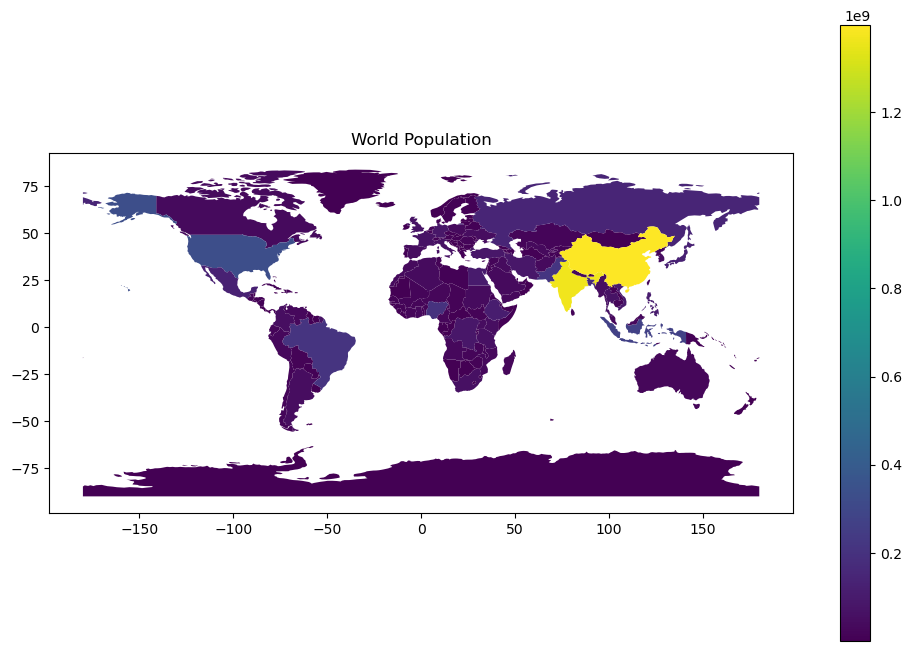

In [5]:
world.plot('pop_est', legend=True,figsize=(12,8))
plt.title('World Population')

And just for fun, let's compare the same data to a pie chart. Pie charts are often used to gauge the relative size and the differences between two or more different categories on one chart. In this case, we have a lot of different categories of very differing sizes.

([<matplotlib.patches.Wedge at 0x27c8eba06a0>,
 [Text(1.0999999266146816, 0.00040180554387874237, 'Fiji'),
  Text(1.0996688360329419, 0.026989832492167187, 'Tanzania'),
  Text(1.098701477176473, 0.053432799386111215, 'W. Sahara'),
  Text(1.0977289079130863, 0.07064874189922488, 'Canada'),
  Text(1.0748091777350897, 0.2340624520430833, 'United States of America'),
  Text(1.0307416022400009, 0.3841506858144549, 'Kazakhstan'),
  Text(1.0222926968991068, 0.40610053172428984, 'Uzbekistan'),
  Text(1.015078439452945, 0.4238109976838428, 'Papua New Guinea'),
  Text(0.9599150225448206, 0.5371807419228436, 'Indonesia'),
  Text(0.8824920891246778, 0.6566640789873937, 'Argentina'),
  Text(0.864970473409685, 0.6795778690697818, 'Chile'),
  Text(0.8346703891700961, 0.7164672647390392, 'Dem. Rep. Congo'),
  Text(0.8054968485297773, 0.749116030404234, 'Somalia'),
  Text(0.7859328355304427, 0.7696165136190091, 'Kenya'),
  Text(0.7552067637826568, 0.799789187184302, 'Sudan'),
  Text(0.7356997968723159,

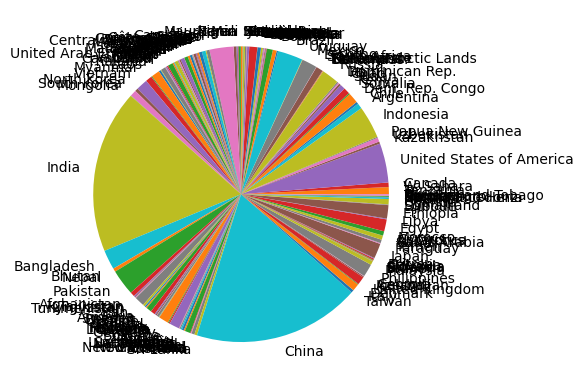

In [23]:
plt.pie(world['pop_est'],labels = world['name'])

Obviously this is an extreme example, but I am just playing devil's advocate. In the heatmap you can easily see country boundaries and the color that represents their estimated population. In the pie chart there are so many countries that have low populations relative to China, India, or the United States that they get lost. It's hard to even pick out the United Kingdom in the pie chart, but on the map you can see it clearly.

### Interactive Maps

In the next couple maps we are going to use the explore function which makes the map interactive. You can drag, zoom, and highlight the data in the polygons. The added benefit of interactive maps is the ability to isolate data you are most interested in. By being able to zoom into specific regions or click on unique polygons, you are removing a lot of the clutter that can be caused by plotting a lot of data. For instance, a bar chart with 100 categories, labels, and colors can be very overwhelming. But the same data can be show on a map where the user can zoom to the specific region they are interested and forego all the other visual pollution. 

In the map below we are only feeding the function which data we want represented in the polygons (column = 'pop_est') and what color scheme we want to use (cmap = 'magma').

In [14]:
world.explore(column='pop_est',cmap='magma')

In the map below we subset our world view to just Asia. We also play with a few more parameters you can pass into explore. In our case we column = 'gdp_md_est' to set GDP as our scale, cmap = 'magma' again, legend = True to plot our heatramp, tooltip = ['name','gdp_md_est'] limits the amount of metadata that shows in the pop-up, and tiles = 'CartoDB positron' which sets the style of the map. There are other parameters would could have added like 'popup' which makes it so you have to click on a polygon for the metadata to display as opposed to just hovering over it and style_kwds which adds more customization for the borders, labels, and colors.

In [25]:
asia = world[world['continent'] =='Asia']
asia.explore(column='gdp_md_est',
             cmap='magma',
             legend=True,
             tooltip=['name','gdp_md_est'],
             tiles='CartoDB positron')

<BarContainer object of 47 artists>

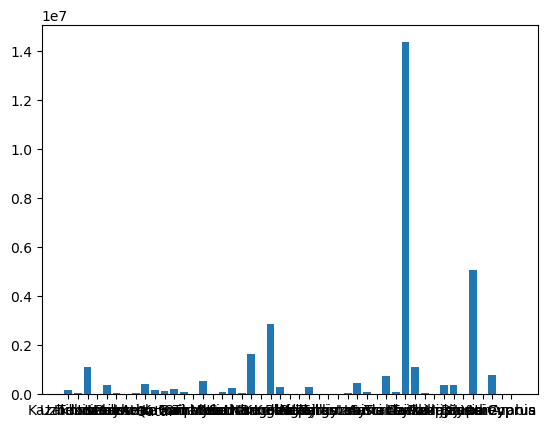

In [29]:
plt.bar(asia['name'],asia['gdp_md_est'])

Again here, labels are over taking each other, some bars are basically zero compared to China. I am being a little biased by not cleaning up the axis here but the only way to do that would be to remove some labels, make the text smaller, and rotate the text vertically. And even still the map is easier to read.

As you can see, maps make this data more visually appealing and by using the heat ramp you can tell the story of the data quicker. The key to a good data visualization is how well the visual tells the story, how quickly the visual tells the story, and how appealing to the eye the visual is. For all cases, these maps are better visualizations than bar charts, line graphs, and pie charts.

## Mapping Time Series Data

In this section we will be using a dataset with tractor installations and dates for different districts in India. We will begin by making a static map to get used to the data and then we will move onto making a time series movie of the data. Since the data set is so large we are going to only be looking at data in Uttar Pradesh.

### Starting with Static Choropleth

In [39]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import geopandas as gpd

In [38]:
fp = "India_Districts_2020\\India_Districts.shp"
map_df = gpd.read_file(fp)
map_df_up = map_df[map_df['stname'] == 'UTTAR PRADESH']
map_df_up.head()

,dtname,stname,stcode11,dtcode11,year_stat,Dist_LGD,State_LGD,JID,geometry
158,Amroha,UTTAR PRADESH,09,137,2011_c,154.0,9.0,194,"POLYGON ((78.07308 29.08236, 78.07308 29.08236..."
159,Hapur,UTTAR PRADESH,09,705,update2014,661.0,9.0,198,"POLYGON ((78.04630 28.88387, 78.04740 28.88388..."
160,Bareilly,UTTAR PRADESH,09,150,2011_c,130.0,9.0,201,"POLYGON ((79.41858 28.90119, 79.41971 28.90089..."
161,Pilibhit,UTTAR PRADESH,09,151,2011_c,173.0,9.0,202,"POLYGON ((79.81967 28.88726, 79.82096 28.88680..."
162,Bulandshahr,UTTAR PRADESH,09,142,2011_c,134.0,9.0,205,"POLYGON ((77.96301 28.71528, 77.96318 28.71511..."


In [40]:
df = pd.read_csv('data\\UP_dummy_data.csv')
df_district = df['installation_district'].value_counts().to_frame()
df_district.reset_index(inplace=True)
df_district.columns = ['district','count']
df_district.head()

,district,count
0,Meerut,28
1,Azamgarh,27
2,Lakhimpur Kheri,17
3,Kanpur,15
4,Sonbhadra,15


In [35]:
merged = map_df_up.set_index('dtname').join(df_district.set_index('district'))
merged.head()

,stname,stcode11,dtcode11,year_stat,Dist_LGD,State_LGD,JID,geometry,count
dtname,,,,,,,,,
Amroha,UTTAR PRADESH,09,137,2011_c,154.0,9.0,194,"POLYGON ((78.07308 29.08236, 78.07308 29.08236...",NaN
Hapur,UTTAR PRADESH,09,705,update2014,661.0,9.0,198,"POLYGON ((78.04630 28.88387, 78.04740 28.88388...",NaN
Bareilly,UTTAR PRADESH,09,150,2011_c,130.0,9.0,201,"POLYGON ((79.41858 28.90119, 79.41971 28.90089...",5.0
Pilibhit,UTTAR PRADESH,09,151,2011_c,173.0,9.0,202,"POLYGON ((79.81967 28.88726, 79.82096 28.88680...",4.0
Bulandshahr,UTTAR PRADESH,09,142,2011_c,134.0,9.0,205,"POLYGON ((77.96301 28.71528, 77.96318 28.71511...",NaN


In [36]:
merged['count'].fillna(0,inplace=True)
max_installs = merged['count'].max()

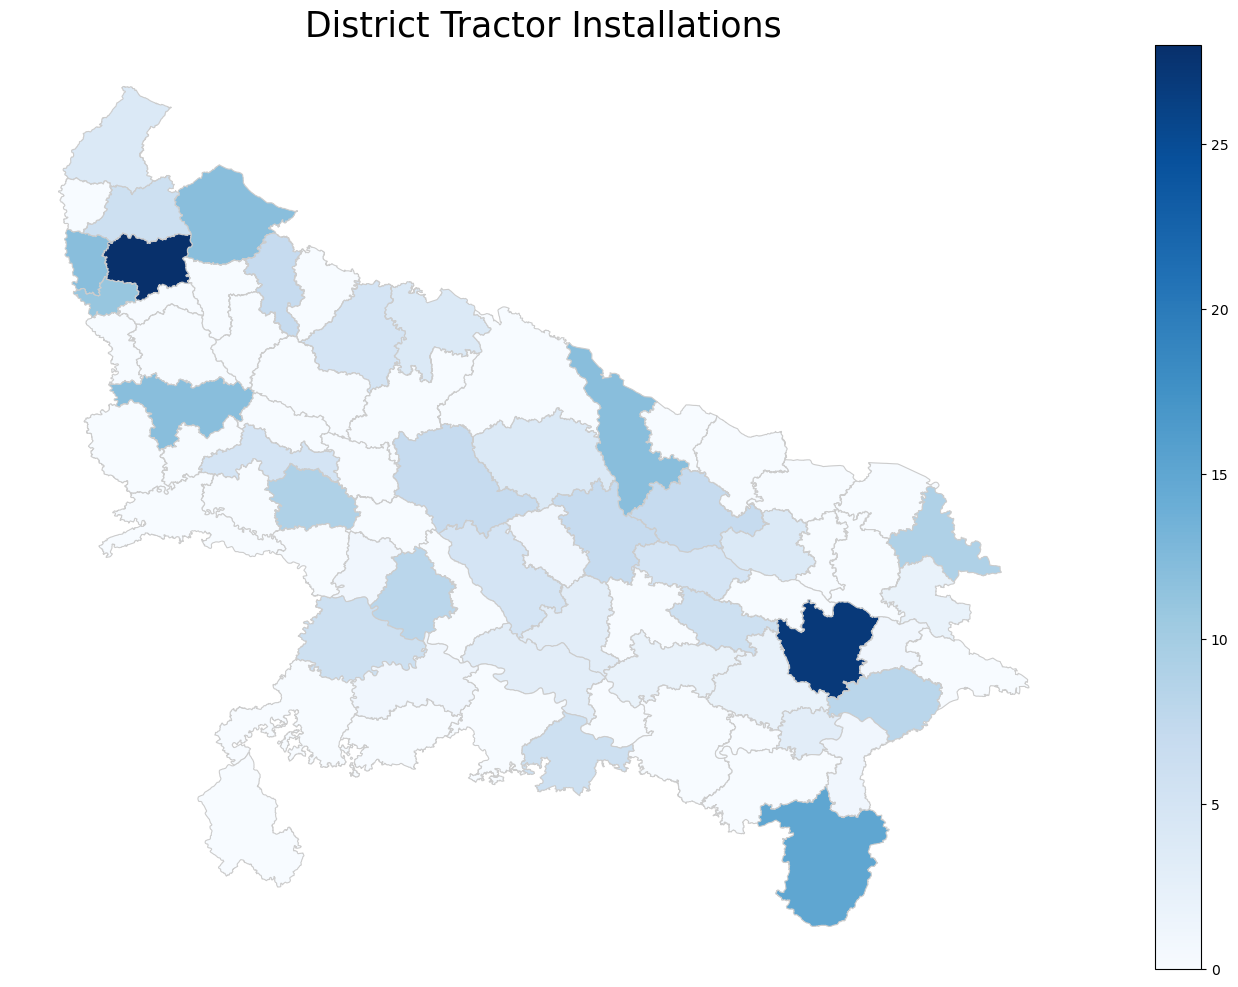

In [61]:
fig, ax = plt.subplots(1, figsize=(20, 12))
merged.plot(column='count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('District Tractor Installations', fontdict={'fontsize': '25', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=max_installs))
cbar = fig.colorbar(sm)

The choropleth above is all tractor installations during throughout the dataset plotted per district, much like the static maps earlier in the notebook. 

### Turning many maps into a time series

Now let's take the idea from the choropleth and make a moving image that shows the accumulative number of installations over time. To do this we will essentially be making a choropleth map for each individual day making similar dataframes as above, but adding the totals for each day that passes. For example, map one will have the number of installations per district on day one, map two will be the number of installations per district on day one and day two, and so on. 

In [45]:
df['Installed On'] = df['Installed On'].apply(lambda x: x.split('T')[0])
df['Installed On'] = pd.to_datetime(df['Installed On'],format="%Y-%m-%d")
df.head()

,Tractor Model,Installed On,installation_state,installation_district
0,MAHINDRA ARJUN Ultra 605 DI-57HP,2019-10-12,Uttar Pradesh,Aligarh
1,MAHINDRA BHOOMIPUTRA 265 DI-35 HP,2019-10-14,Uttar Pradesh,Aligarh
2,MAHINDRA BHOOMIPUTRA 265 DI-35 HP,2019-10-14,Uttar Pradesh,Aligarh
3,MAHINDRA BHOOMIPUTRA 265 DI-35 HP,2019-11-26,Uttar Pradesh,Aligarh
4,MAHINDRA ARJUN Ultra 1 555 DI-50 HP,2020-01-09,Uttar Pradesh,Aligarh


In the cell block below we are setting our minimum date and the total number of unique days in the dataset. It then iterates through a for loop where in each iteration, it adds i number of days to the minimum date to create the date range for the accumulation. So the first iteration is just the minimum date, the second interation is the minimum date through the day after, and so on. It then subsets the whole dataset to just the range, groups the subset by district name, and counts all the values. From there it makes a choropleth and saves it locally. 

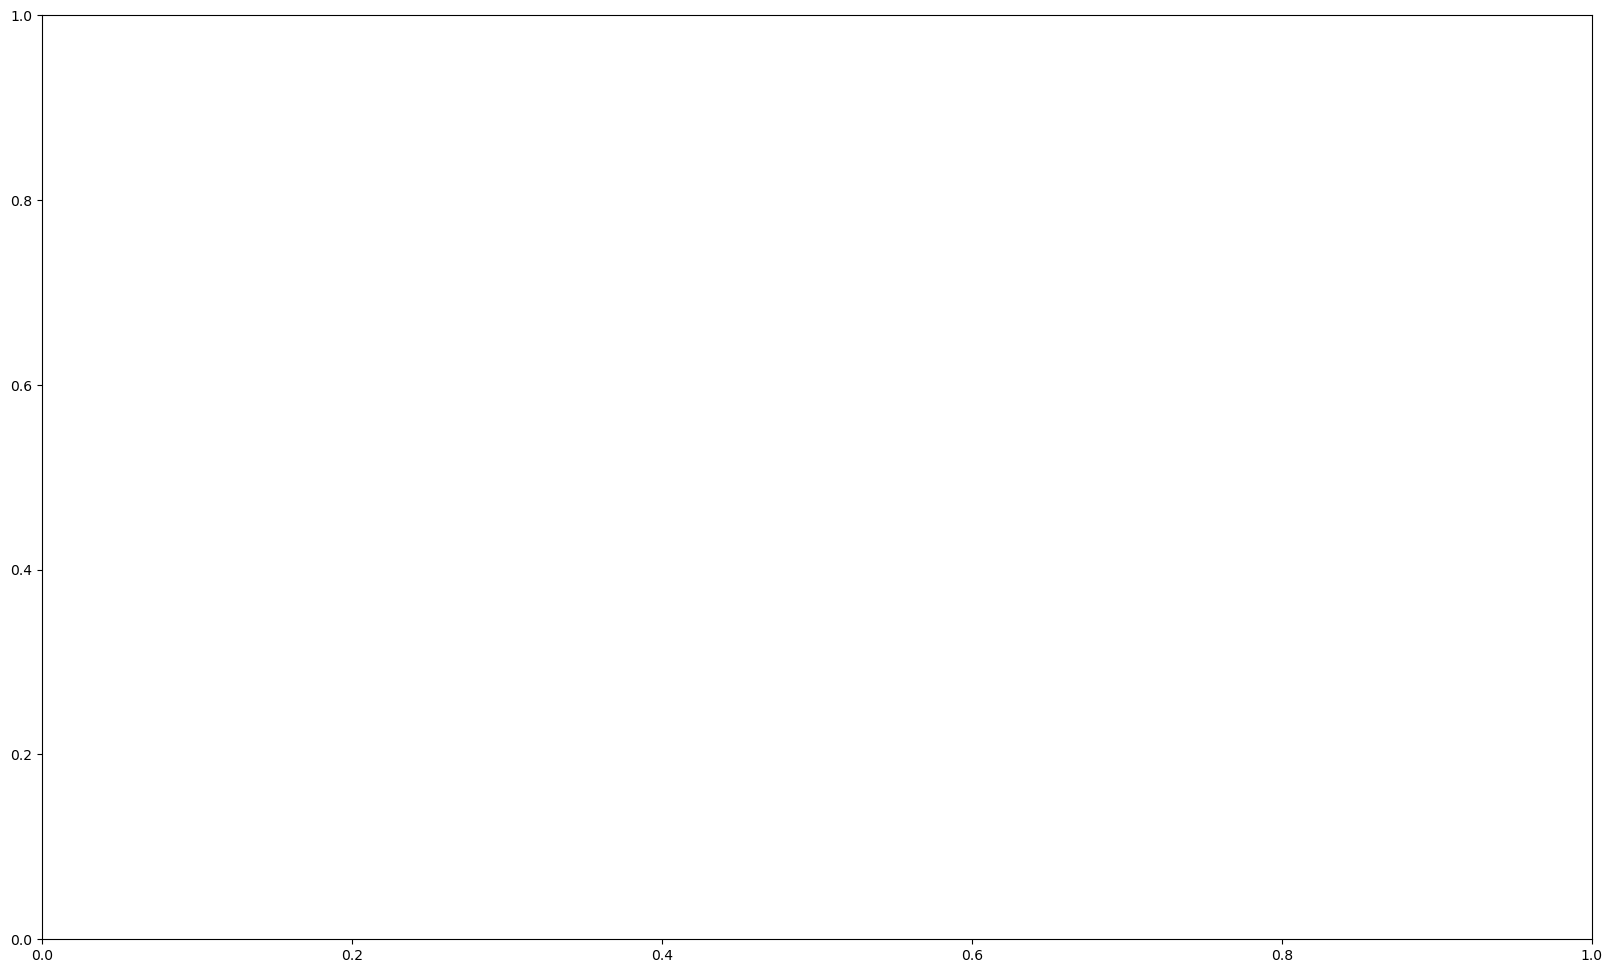

In [15]:
date_min = df['Installed On'].min()
n_days = df['Installed On'].nunique()

fig, ax = plt.subplots(1, figsize=(20, 12))

for i in range(0,n_days):
    date = date_min+timedelta(days=i)
    
    df_c = df[df['Installed On'] <= date]
    
    df_t = df_c['installation_district'].value_counts().to_frame()
    df_t.reset_index(inplace=True)
    df_t.columns = ['dist','count']
    
    df_m = map_df_up.set_index('dtname').join(df_t.set_index('dist'))
    df_m['count'].fillna(0,inplace=True)
    
    fig, ax = plt.subplots(1, figsize=(20, 12))
    df_m.plot(column='count',
                cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')
    ax.set_title('District Tractor Installations', 
                 fontdict={'fontsize': '25', 'fontweight' : '3'})
    sm = plt.cm.ScalarMappable(cmap='Blues', 
            norm=plt.Normalize(vmin=0, vmax=df_t['count'].iloc[0]))
    cbar = fig.colorbar(sm)
    fontsize = 36
    
    date_x = 82
    date_y = 29

    ax.text(date_x, date_y, 
            f"{date.strftime('%b %d, %Y')}", 
            color='black',
            fontsize=fontsize)
    fig.savefig(f"frames_gpd/frame_{i:03d}.png", 
                dpi=100, bbox_inches='tight')
    plt.close()

The code block below creates a cumulative count of all the tractors installed per district. It starts by making a template dataframe that holds the columns we are initially interested in, then it goes through a for loop doing one district at a time, merging the cumulative count per date that a tractor was installed to the template, calculated a cumulative sum of the cumulative counts per date, then finally appends the final dataframe of each district to a master dataframe that will be used to make the plot.

In [189]:
dates = list(pd.date_range(date_min,date_max-timedelta(days=1),freq='d'))
cumCount = pd.DataFrame(columns = ['installation_district','Installed On','countByDate','cumSum'])
districts = df['installation_district'].unique()

for district in districts:
    template = pd.DataFrame(columns = ['installation_district','Installed On','countByDate'])
    template['Installed On'] = dates
    template['installation_district'] = district
    
    sub = df[df['installation_district'] == district]
    sub['countByDate'] = sub.groupby('Installed On').cumcount()
    sub['countByDate'] = sub['countByDate'] + 1
    sub = sub[['installation_district','Installed On','countByDate']]
    sub = sub.sort_values('countByDate', ascending=False).drop_duplicates('Installed On').reset_index()
    
    merged = pd.merge(template, sub, how = 'left', on=["Installed On"])
    merged = merged[['Installed On','installation_district_x','countByDate_y']]
    merged['countByDate_y'].fillna(0,inplace=True)
    merged['cumSum'] = merged['countByDate_y'].cumsum()
    merged = merged.T.drop_duplicates().T
    merged.columns = ['Installed On','installation_district','countByDate','cumSum']
    
    cumCount = pd.concat([cumCount, merged], ignore_index=True, axis=0)

The code block below takes all the choropleths from the block above and stitches them all together into one mp4 file. There are other ways that this operation is achievable but many of them required other software, running code outside of Python, or library downloads that I didn't have setup on my machine. This notebook is specifically meant to highlight uses of GeoPandas but this form of visualization could also be achieved by using ArcGIS, QGIS, or ESRI map builders. 

In [3]:
import os
import glob
from natsort import natsorted
from moviepy.editor import *

base_dir = os.path.realpath("./images")
print(base_dir)

gif_name = 'pic'
fps = 30

file_list = glob.glob('frames_gpd/*.png')  # Get all the pngs in the current directory
file_list_sorted = natsorted(file_list,reverse=False)  # Sort the images

clips = [ImageClip(m).set_duration(0.5)
         for m in file_list_sorted]

concat_clip = concatenate_videoclips(clips, method="compose")
concat_clip.write_videofile("district_installations.mp4", fps=fps)

C:\Users\ryanp\Documents\PortfolioCode\images
Moviepy - Building video test.mp4.
Moviepy - Writing video test.mp4



Moviepy - Done !
Moviepy - video ready test.mp4


In [4]:
from IPython.display import Video
Video('district_installations.mp4')

And just for comparison's sake...

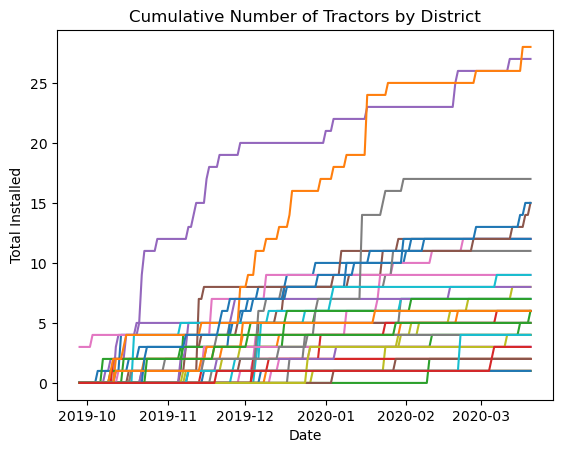

In [192]:
for district in districts:
    district_df = cumCount[cumCount['installation_district'] == district]
    plt.plot(district_df['Installed On'], district_df['cumSum'], label=district)

plt.xlabel('Date') 
plt.ylabel('Total Installed') 
plt.title('Cumulative Number of Tractors by District')
plt.show()